In [14]:
# for data analysis
import pandas as pd 
import numpy as np
import random as rnd
import sys

# for data viz
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

# for machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [15]:
train_data = pd.read_csv('processed_cleveland_data_train.csv')
test_data = pd.read_csv('processed_cleveland_data_test.csv')

# Parameter of interest is num, for now this is a binary problem
def make_prediction_var_binary(df):
    df['num'] = df['num'].replace([1, 2, 3, 4, 5, 6], 1)

        
make_prediction_var_binary(train_data)
make_prediction_var_binary(test_data)

train_data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
166,35,1,4,126,282,0,2,156,1,0.0,1,0,7,1
211,52,1,4,112,230,0,0,160,0,0.0,1,1,3,1
158,68,1,3,118,277,0,0,151,0,1.0,1,1,7,0
152,55,1,4,160,289,0,2,145,1,0.8,2,1,7,1


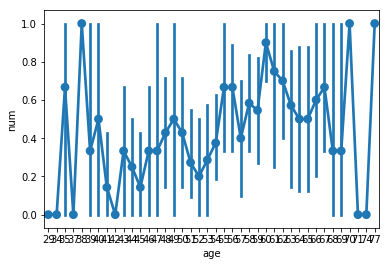

In [16]:
sns.pointplot(x='age', y='num', data=train_data)

In [17]:
train_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [18]:
from sklearn.model_selection import train_test_split

X_train = train_data.drop(['num'], axis=1)
y_train = train_data['num']

X_test = test_data.drop(['num'], axis=1)
y_test = test_data['num']

y_train.head()

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose classifer 

clf = MLPClassifier()

# Choose Parameters and stuff
parameters = {'solver': ['lbfgs'],
             'alpha':[1e-4],
             'hidden_layer_sizes':[(14),(14,14,14)],
             'random_state': [1]}

# Type of scoring to compare parameter combos 
acc_scorer = make_scorer(accuracy_score)

# Run grid search 
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Pick the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data 
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(14, 14, 14), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [83]:
all_data = pd.read_csv('processed_cleveland_data.csv')
make_prediction_var_binary(all_data)
X_all = all_data.drop(['num'], axis=1)
y_all = all_data['num']

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

0.83606557377
             precision    recall  f1-score   support

          0       0.79      0.90      0.84        30
          1       0.89      0.77      0.83        31

avg / total       0.84      0.84      0.84        61



In [84]:
# Cross Validation with KFold
from sklearn.cross_validation import KFold


def run_kfold(clf):
    kf = KFold(297, n_folds=5)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        mean_outcome = np.mean(outcomes)
        print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)
    

Fold 1 accuracy: 0.8833333333333333
Mean Accuracy: 0.8833333333333333
Fold 2 accuracy: 0.8833333333333333
Mean Accuracy: 0.8833333333333333
Fold 3 accuracy: 0.7627118644067796
Mean Accuracy: 0.843126177024482
Fold 4 accuracy: 0.8305084745762712
Mean Accuracy: 0.8399717514124293
Fold 5 accuracy: 0.7457627118644068
Mean Accuracy: 0.8211299435028249
